### Audio Processing Exam - Terms and Knowledge

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas
import math
import itertools

# Oscillator

An oscillator is a object that generates a sequence of numbers that repeat after a certain interval. The most simple and common oscillator is producded by the sine wave which is generated by the sin() function.

# Creating a sine oscillator 
The sinus wave repeats with a time period of 2$\pi$. If we want to generate a 1 Hz signal with a sample rate of 512Hz, we'd have to create 512 divisions on a number line between 0 and 2$\pi$ and at each division/position on the number line we apply the mathematical sine wave function, which gives us an output sample of the sine wave at that division/position.

Since we don’t want to generate all the samples at once, we can just increment the input to the sin by a step size when the next sample is required, the step size can be calculated by this:

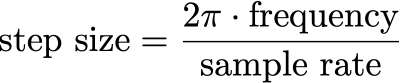

Using the math and itertools we can now create a sine wave generator like this:

In [ ]:
def get_sin_oscillator(freq, sample_rate):
    increment = (2 * math.pi * freq)/ sample_rate
    return (math.sin(v) for v in itertools.count(start=0, step=increment))

_x = get_sin_oscillator(5,1000)

#List comprehension in order to fill out an array with the function
x = [next(_x) for i in range(512)]

#plt.plot(x)

# Sinus Wave

A sinusoid (or a sine wave) is given by
$$
    x(t) = A \cos(\Omega t + \Phi)
$$
where
- $A\geq0$ is the **amplitude**
- $\Omega$ is the **frequency** measured in radians pr. second (SI symbol **rad/s**). Is related to the frequency $f$ measured in cycles pr. second (SI symbol **Hz**) via $\Omega = 2\pi f$.
- $t$ is the **time** measured in seconds (SI symbol **s**)
- $\Phi$ is the **initial phase** measured in radians (SI symbol **rad**)

## Continious-time (analog) and Discrete-time (digital) signals

Signals are represented mathematically as functions of one or more independent variables. 

There are two types of signals: continuous-time signals and discrete-time signals.

**Continuous-time signal (analog signals)**: An analog signal is time-varying and generally bound to a range (e.g. +12V to -12V), but there is an infinite number of values within that continuous range. An analog signal uses a given property of the medium to convey the signal’s information, such as electricity moving through a wire. In an electrical signal, the voltage, current, or frequency of the signal may be varied to represent the information. Analog signals are often calculated responses to changes in light, sound, temperature, position, pressure, or other physical phenomena. When plotted on a voltage vs. time graph, an analog signal should produce a smooth and continuous curve. There should not be any discrete value changes.

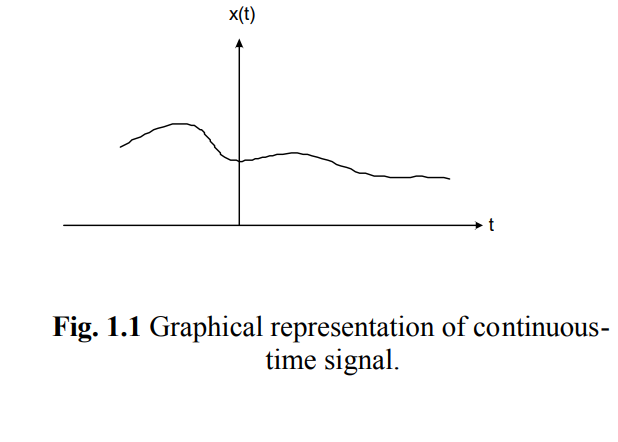

**Discrete-time signal (digital):** A digital signal is a signal that represents data as a sequence of discrete values. A digital signal can only take on one value from a finite set of possible values at a given time. With digital signals, the physical quantity representing the information can be many things: 
 - Variable electric current or voltage
 - Phase or polarization of an electromagnetic field
 - Acoustic pressure
 - The magnetization of a magnetic storage media

Digital signals are used in all digital electronics, including computing equipment and data transmission devices. When plotted on a voltage vs. time graph, digital signals are one of two values, and are usually between 0V and VCC (usually 1.8V, 3.3V, or 5V)

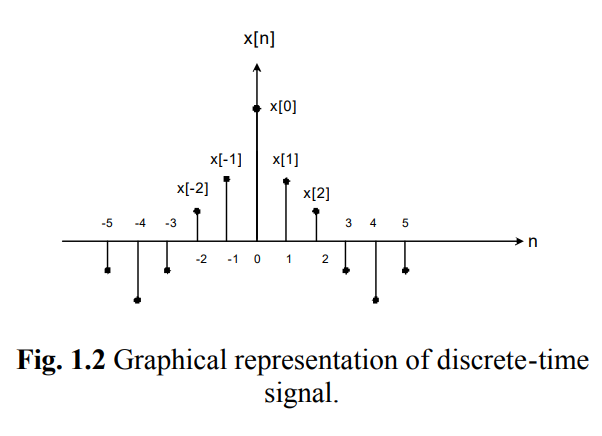

To distinguish between continuous-time and discrete-time signals we use symbol t to denote the continuous variable and n to denote the discrete-time variable. And for continuous-time signals we will enclose the independent variable in parentheses (·), for discrete-time signals we will enclose the independent variable in bracket [·].



## Sample rate

Sampling rate or sampling frequency defines the number of samples per second (or per other unit) taken from a continuous signal to make a discrete or digital signal

## Sampling

In signal processing, sampling is the reduction of a continuous-time signal to a discrete-time signal. A common example is the conversion of a sound wave (a continuous signal) to a sequence of samples (a discrete-time signal).

A sample is a value or set of values at a point in time and/or space. A sampler is a subsystem or operation that extracts samples from a continuous signal. A theoretical ideal sampler produces samples equivalent to the instantaneous value of the continuous signal at the desired points.

The original signal is retrievable from a sequence of samples, up to the Nyquist limit, by passing the sequence of samples through a type of low pass filter called a reconstruction filter.

## Convultion

Convolution takes two signals and produces a third signal.
Convolution is used in the mathematics of many fields, such as probability and
statistics. In linear systems, convolution is used to describe the relationship
between three signals of interest: the input signal, the impulse response, and the output signal.

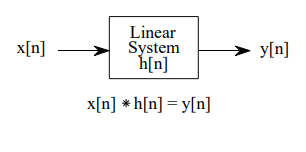

Cross-synthesis is a technique whereby one signal confers one or more of its characteristics onto another. Convolution is a method of cross-synthesis, combining two audio sources in such a manner that, in the frequency domain, those frequencies they have in common will be emphasized proportionately, and those they do not share will be minimized. In the time domain, the way in which those frequencies hang around, get smeared, die away is another part of the convolution process. The sources may both be digital audio files of finite length, or one finite file and the other real-time input (potentially infinite). Convolution is now used commonly for higher-quality reverbs (called convolution reverb—the MOTU Digital Performer convolution reverb plug-in is called ProVerb), for filtering, and for giving a particular sound file certain characteristics of another (talking crash cymbals, for example). Convolution modifies sound in both the frequency domain and the time domain. For two fixed files, the convolution output duration (using orthodox computation methods) will be the total duration of one added to the total duration of the other minus one sample. For convolution reverb, the output sound will ring or sound past the end of the input signal for the length of the impulse file minus one sample.

When discussing convolution theory, one of the signal sources is normally called the input signal (IS) and the other, the unit impulse or impulse response (IR) file.  The signal input (IS) may be a set of finite audio samples (i.e. pre-recorded digital audio) or a potentially infinite audio signal from a DAW track or a microphone

## Nyquist Sampling Theorem 

The Nyquist Theorem, also known as the sampling theorem, is a principle that engineers follow in the digitization of analog signals. For analog-to-digital conversion (ADC) to result in a faithful reproduction of the signal, slices, called samples, of the analog waveform must be taken frequently. The number of samples per second is called the sampling rate or sampling frequency.

Any analog signal consists of components at various frequencies. The simplest case is the sine wave, in which all the signal energy is concentrated at one frequency. In practice, analog signals usually have complex waveforms, with components at many frequencies. The highest frequency component in an analog signal determines the bandwidth of that signal. The higher the frequency, the greater the bandwidth, if all other factors are held constant.

Suppose the highest frequency component, in hertz, for a given analog signal is fmax. According to the Nyquist Theorem, the sampling rate must be at least 2fmax, or twice the highest analog frequency component. The sampling in an analog-to-digital converter is actuated by a pulse generator (clock). If the sampling rate is less than 2fmax, some of the highest frequency components in the analog input signal will not be correctly represented in the digitized output. When such a digital signal is converted back to analog form by a digital-to-analog converter, false frequency components appear that were not in the original analog signal. This undesirable condition is a form of distortion called aliasing.

## Nyquist Rate and Nyquist Frequency

In signal processing, the Nyquist rate, named after Harry Nyquist, specifies a sampling rate. In units of samples per second[1] its value is twice the highest frequency (bandwidth) in Hz of a function or signal to be sampled. With an equal or higher sampling rate, the resulting discrete-time sequence is said to be free of the distortion known as aliasing. Conversely, for a given sample rate, the corresponding Nyquist frequency in Hz is the largest bandwidth that can be sampled without aliasing, and its value is one-half the sample-rate. Note that the Nyquist rate is a property of a continuous-time signal, whereas Nyquist frequency is a property of a discrete-time system.

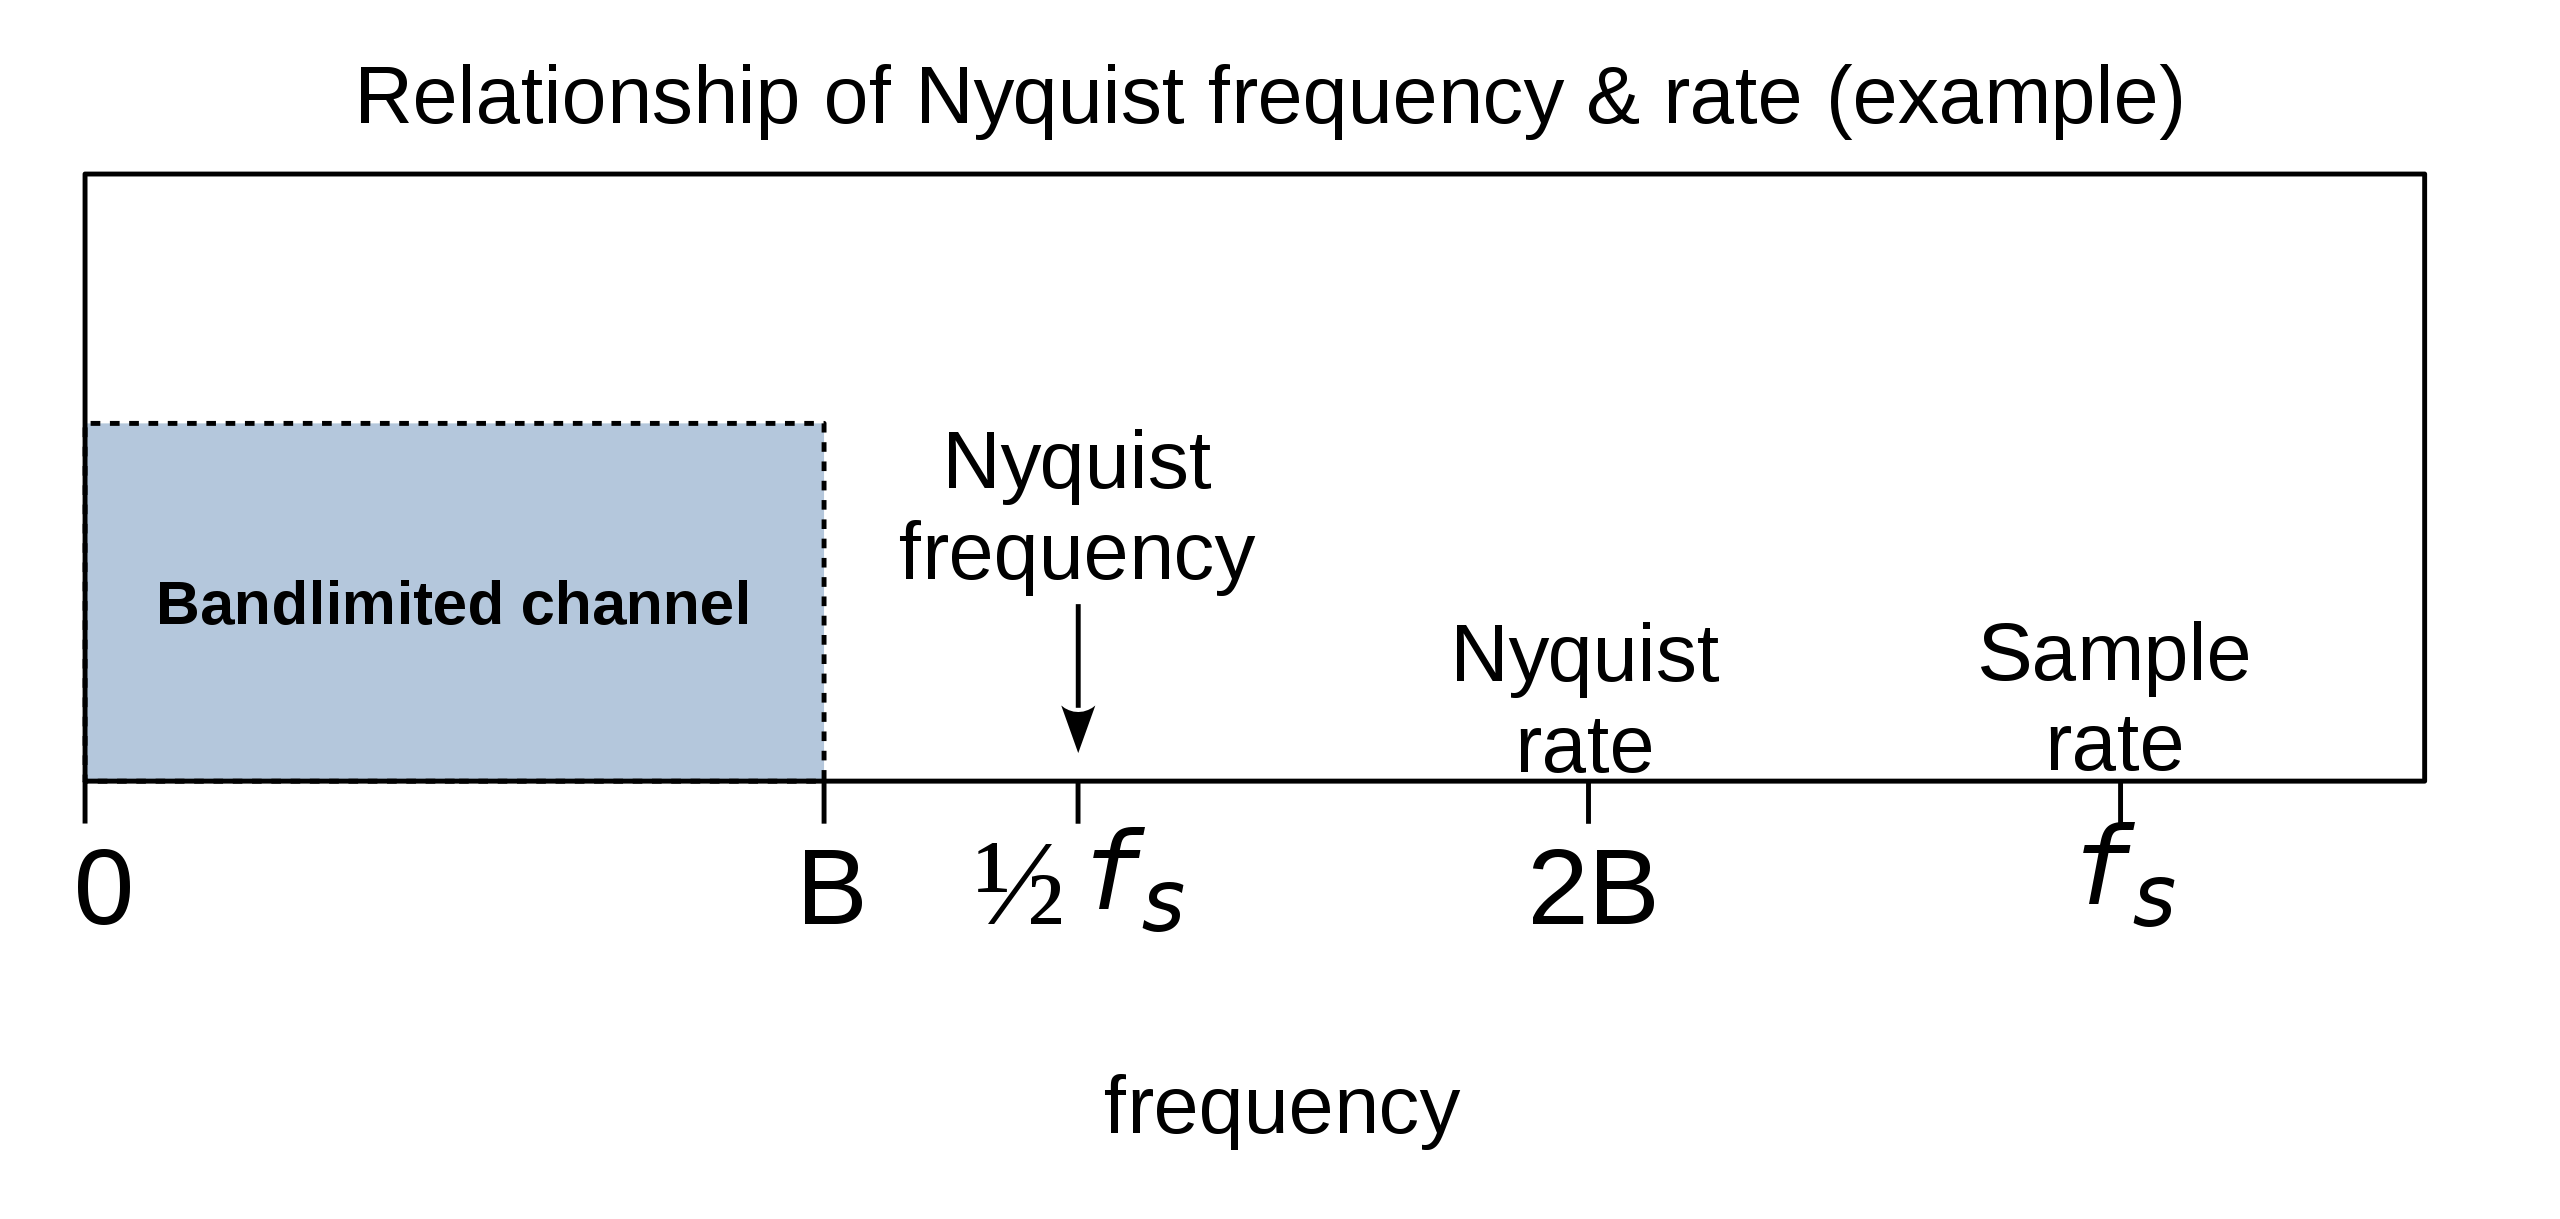

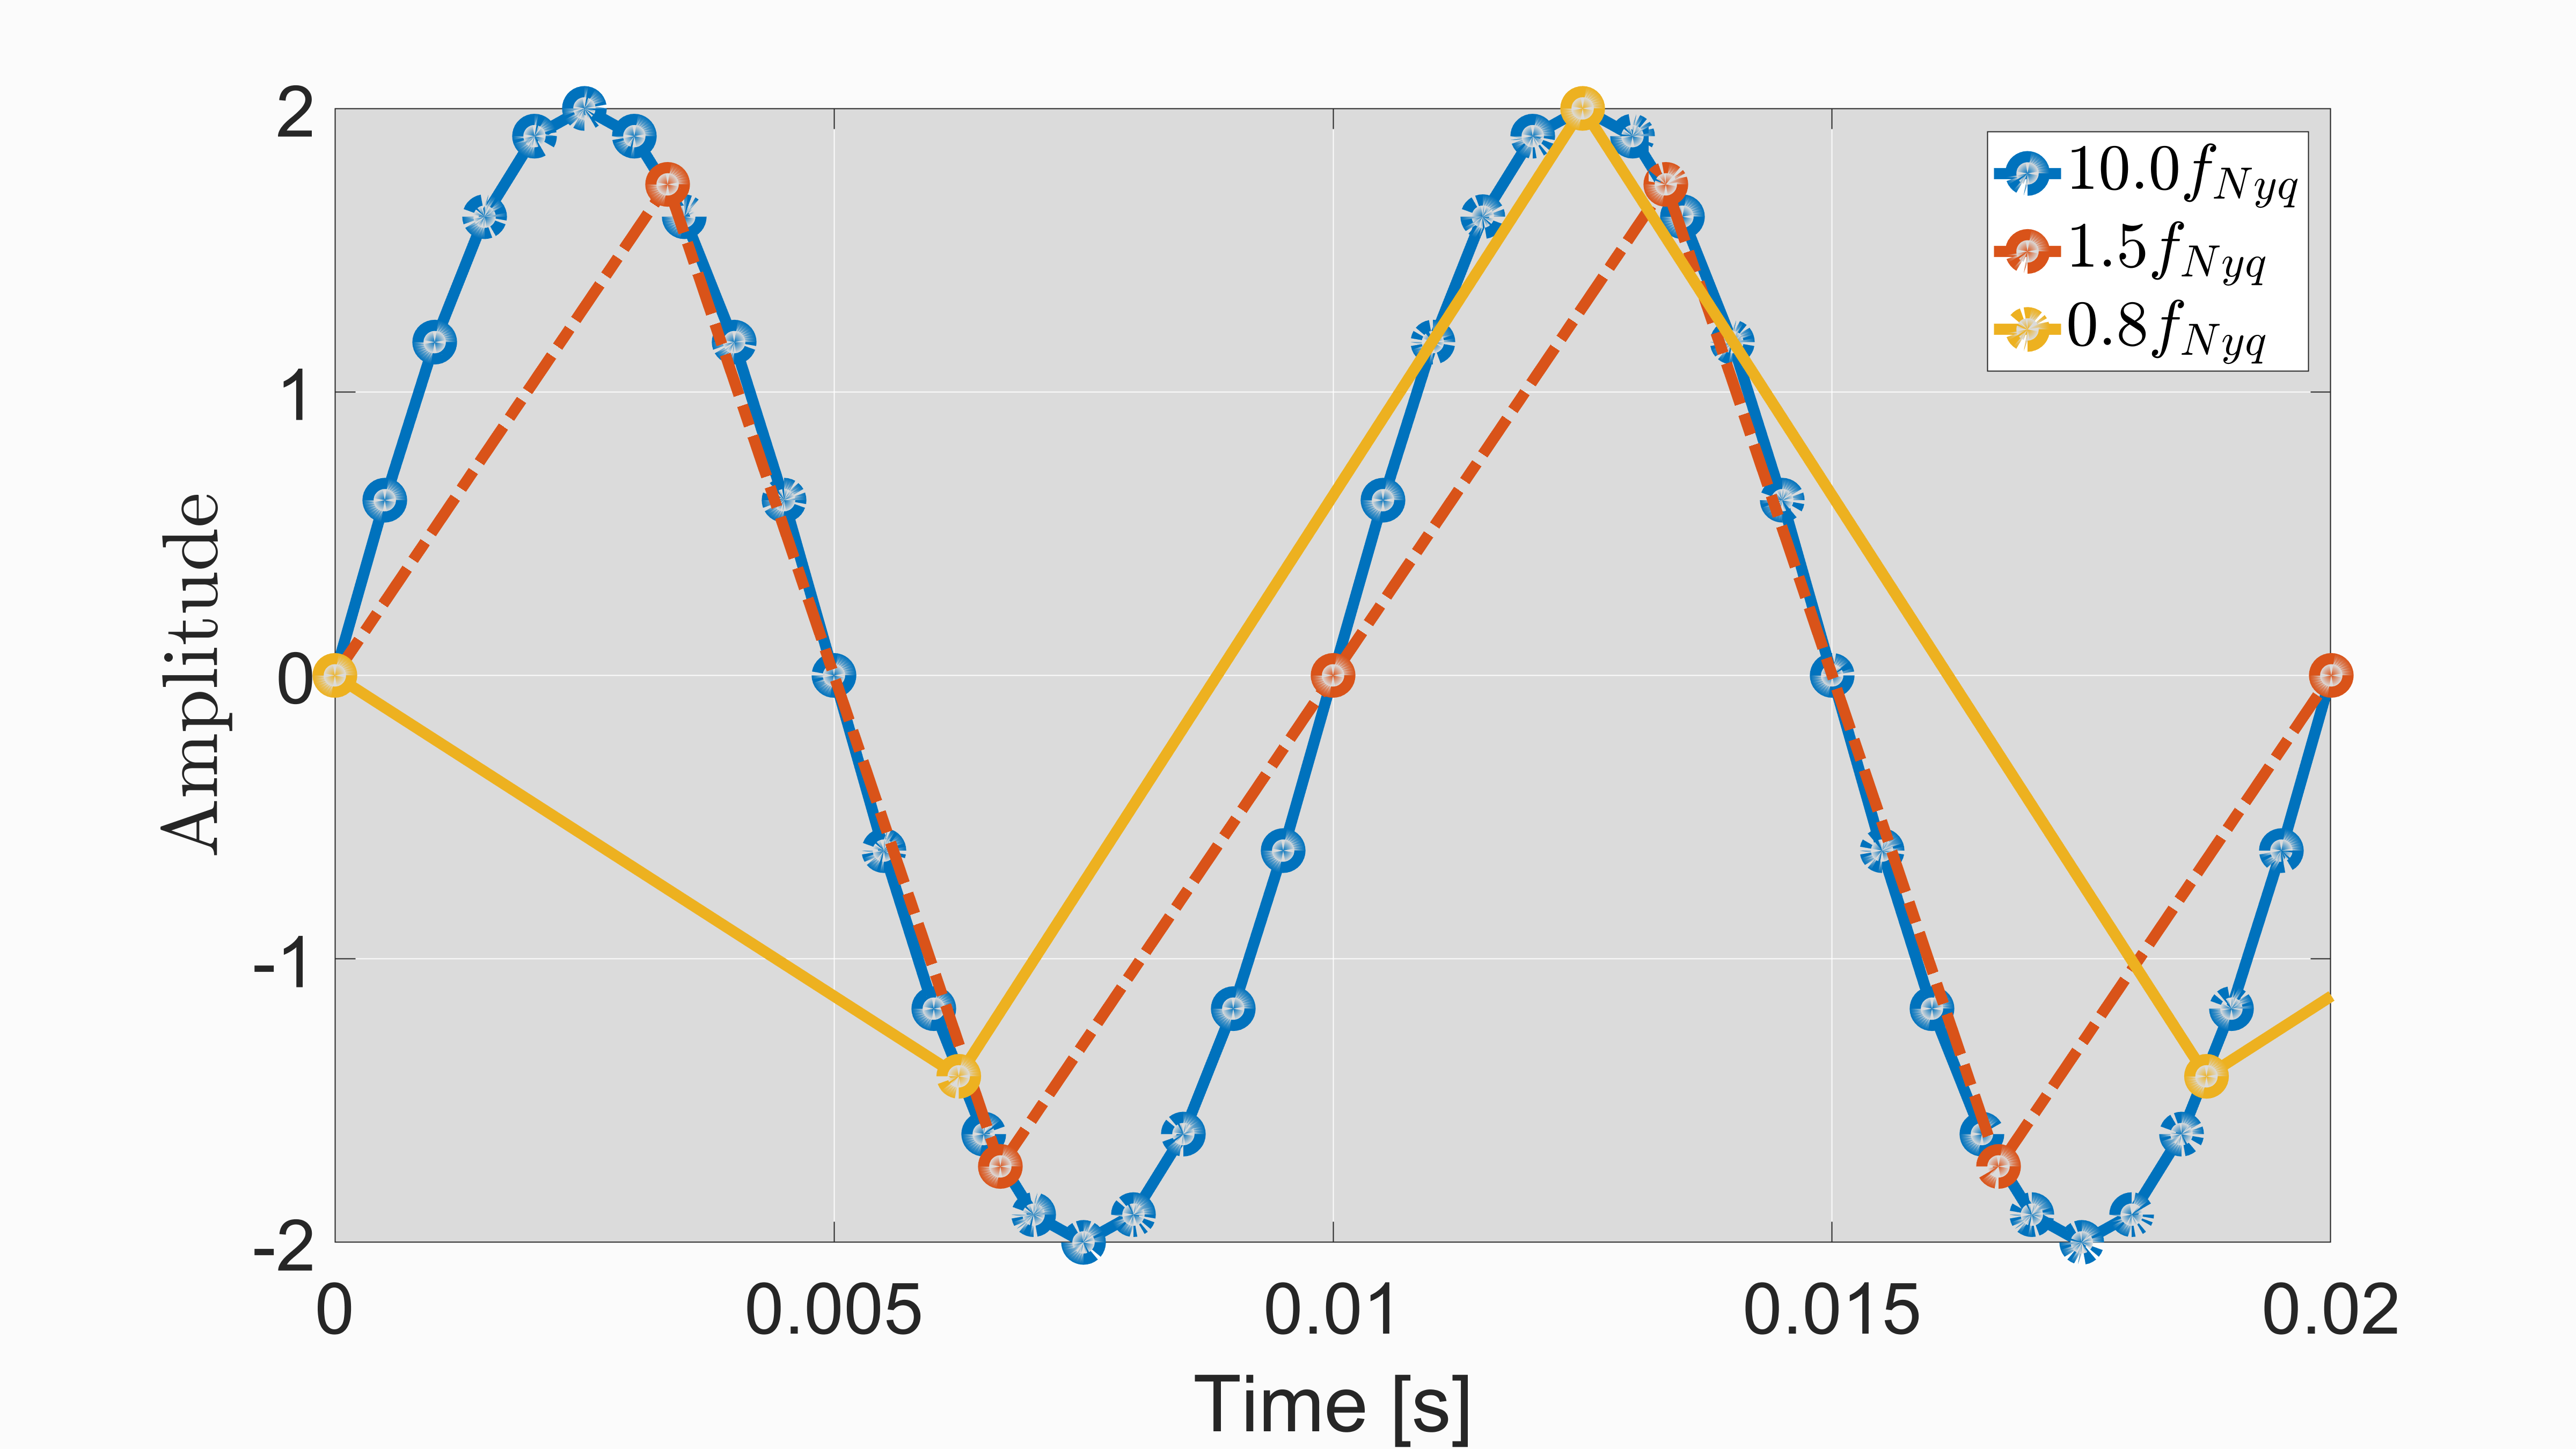

*Figure*: Plot showing the affects of aliasing around the Nyquist frequency. As the sample rate dips below twice the natural frequency, we start to see the inability to replicate the true signal. In this case, a 100 Hz sine wave was inputted, and at 10 times the Nyquist frequency the signal is clearly replicated. At 1.2 times the Nyquist frequency the signal can still be reconstructed, however, once we dip below twice the natural frequency, or below the Nyquist frequency, we can no longer replicate the original 100 Hz signal.

##### Summary: 

- The Nyquist rate is 2B. For a given bandlimited analog signal, it is the minimal sampling rate required to sample the signal without loss.
- The Nyquist frequency is fs/2. For a given sampling rate, it is the maximal frequency that the signal can contain in order to be sampled without loss.

## Time Domain vs Frequency Domain

In the Fourier transform a signal is converted from the time domain to the frequency domain.

In the **time domain** we plot amplitude (y) vs time (x). For example consider a typical Electro cardiogram (ECG). If the doctor maps the heartbeat with time say the recording is done for 20 minutes, we call it a time domain signal.

In the **frequency domain** we plot amplitude (y) vs frequency (x). The frequency domain can be perceived to be less complex than the time domain. Frequency is nothing but the number of times each event has occured during total period of observation. Frequency domain analysis is much simple as you can figure out the key points in the total interval rather than putting your eye on every variation which occurs in time domain analysis. 

**Extra**

For example, using the Fourier transform, a sound wave, such as human speech, can be broken down into its component tones of different frequencies, each represented by a sine wave of a different amplitude and phase. The response of a system, as a function of frequency, can also be described by a complex function. In many applications, phase information is not important. By discarding the phase information, it is possible to simplify the information in a frequency-domain representation to generate a frequency spectrum or spectral density. A spectrum analyzer is a device that displays the spectrum, while the time-domain signal can be seen on an oscilloscope.

## Fast Fourier Transform

Source: https://makersportal.com/blog/2018/9/13/audio-processing-in-python-part-i-sampling-and-the-fast-fourier-transform

The Fast Fourier Transform, proposed by Cooley and Tukey in 1965, is an efficient computational algorithm of the Discrete Fourier Transform (DFT). The DFT decomposes a signal into a series of the following form:

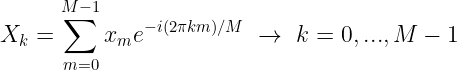

where xm is a point in the signal being analyzed and the Xk is a specific 'mode' or frequency component. Notice that the frequency component can only go up to the length of the signal (M-1), and we will discuss a little later the limitations from there as well (Nyquist).

From above, the complex exponential can be rewritten as sine and cosine functions using the Euler formula:

image.png

Such that our series contains sinusoidal waves:

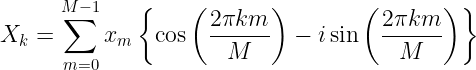



image.png

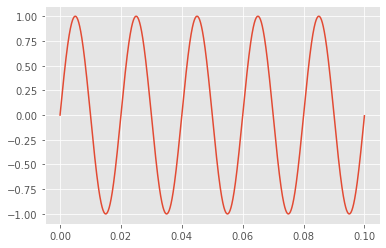

In [ ]:
#Creating a simple sine wave for the fft
# sampling a sine wave programmatically
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# sampling information
Fs = 44100 # sample rate
T = 1/Fs # sampling period
t = 0.1 # seconds of sampling
N = Fs*t # total points in signal

# signal information
freq = 50 # in hertz, the desired natural frequency
omega = 2*np.pi*freq # angular frequency for sine waves

t_vec = np.arange(N)*T # time vector for plotting
y = np.sin(omega*t_vec)

plt.plot(t_vec,y)
plt.show()

The code above ‘samples’ a sine wave at 44.1 kHz for 0.1 seconds (100 ms). I used a 100 Hz sine wave, so we expect:


image.png

"In order to recover all Fourier components of a periodic waveform, it is necessary to use a sampling rate fs at least twice the highest waveform frequency" (Nyquist frequency/limit)

The above statement requires the user to sample a signal at twice the highest natural frequency of the expected system, or mathematically:

image.png

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7795dd5d-bbf3-4739-b229-8489999d5d0b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>